In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of sample points
a,b,c,=2,1,1
N = (2**a)*(3**b)*(5**c)
# sample spacing

In [44]:
x = np.arange(0,2*np.pi,2*np.pi/ N)
y = np.e**(-5*x*x) + np.e**(-5*(x-2*np.pi)**2)
yf = scipy.fftpack.fft(y)

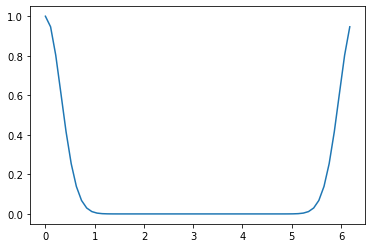

In [46]:
plt.plot(x,y)

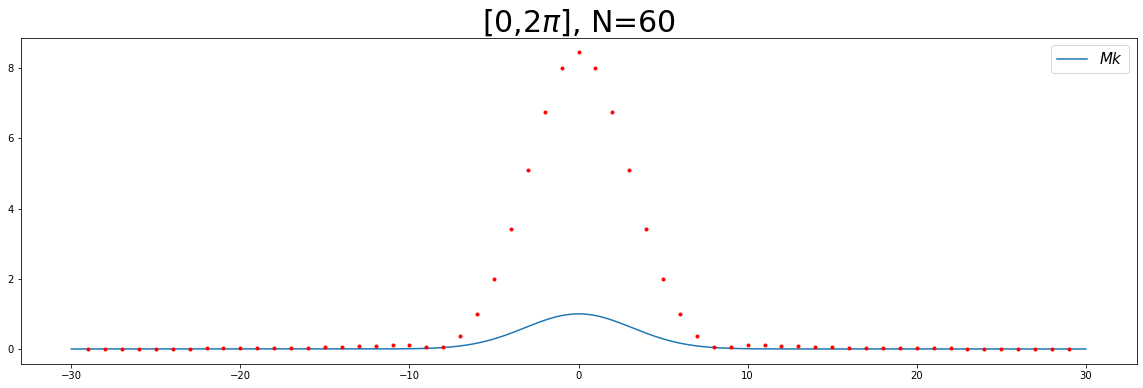

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 60
# sample spacing

k = np.linspace(-N//2,N//2,5000)
Mk = np.e**(-(k*k)/20)

x = np.linspace(0.0,2*np.pi, N)
y = np.e**(-5*x*x) + np.e**(-5*(x-2*np.pi)**2)
yf = scipy.fftpack.fft(y)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(k,Mk,label='$Mk$')

for i in range(-N//2+1, N//2):
    ax.plot(i,np.abs(yf[i]),marker='.',color='r')

plt.legend(fontsize=15)
plt.title("[0,2$\pi$], N=60",fontsize=30)
plt.show()

In [107]:
def g(x,N,yf):
    total = yf[N-1]
    e0 = np.cos(x)+1j*np.sin(x)
    for k in range(N-2,-1,-1):
        total = yf[k]+e0*total
    return total

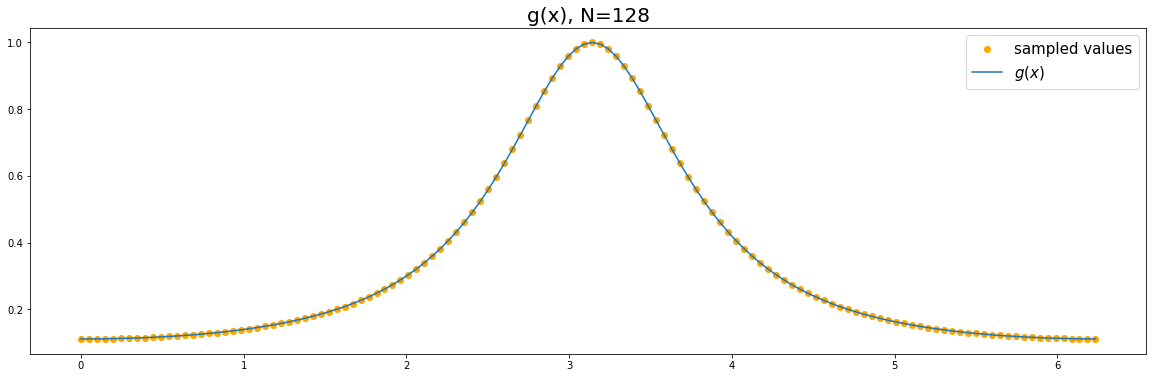

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 128

x = np.linspace(0,2*np.pi*(1-1/N), N)
y = 1/(5+4*np.cos(x))
yf = scipy.fftpack.fft(y)
gx = g(x,N,yf)

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x,y,label='sampled values',color='orange')
ax.plot(x,np.real(gx)/N,label='$g(x)$')
plt.title("g(x), N=128",fontsize=20)
plt.legend(fontsize=15)

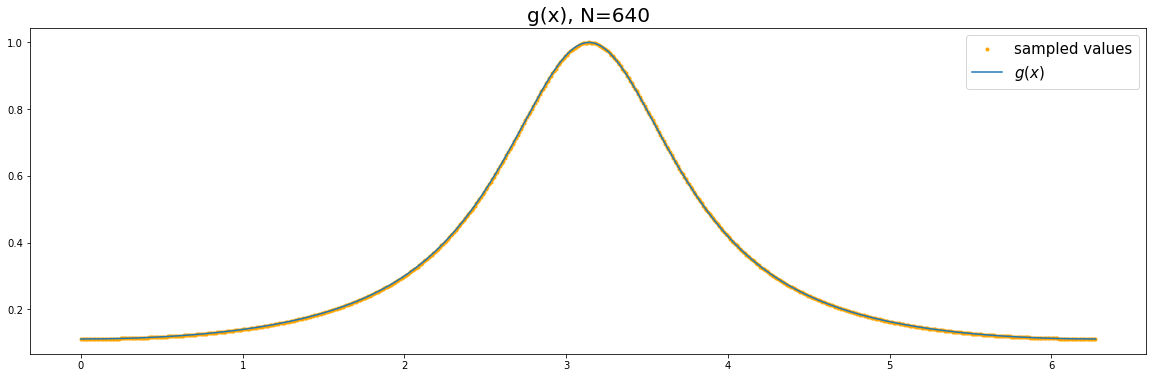

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 640

x = np.linspace(0,2*np.pi*(1-1/N), N)
y = 1/(5+4*np.cos(x))
yf = scipy.fftpack.fft(y)
gx = g(x,N,yf)

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x,y,label='sampled values',color='orange',marker='.')
ax.plot(x,np.real(gx)/N,label='$g(x)$')
plt.title("g(x), N=640",fontsize=20)
plt.legend(fontsize=15)

In [100]:
def h(x,N,yf):
    total = 0
    for k in range(-N//2+1,N//2):
        total += yf[k]* np.e**(1j*k*x)
    return total

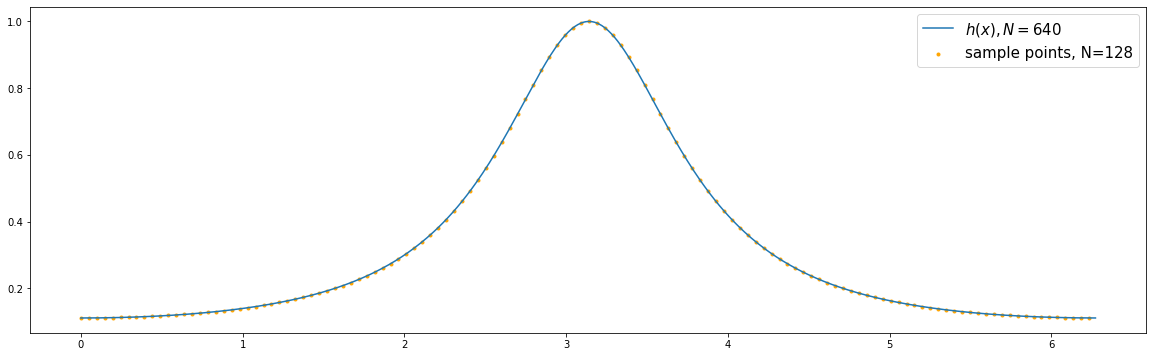

In [105]:
N=640

x = np.linspace(0,2*np.pi*(1-1/N), N)
y = 1/(5+4*np.cos(x))

yf = scipy.fftpack.fft(y)
hx = h(x,N,yf)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x,np.real(hx)/N,label='$h(x), N=640$')

N=128

x = np.linspace(0,2*np.pi*(1-1/N), N)
y = 1/(5+4*np.cos(x))

ax.scatter(x,y,color='orange',marker='.',label='sample points, N=128')

plt.legend(fontsize=15)